### Importing important Libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Required Libraries for Various classifier

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,plot_confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import RFE

### Data Description

 

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)

 

The values for given attributes are averaged over all the games played by players

MIN:  Minutes Played

PTS: Number of points per game

FGM: Field goals made

FGA: Field goals attempt

FG%: field goals percent

3P Made: 3 point made

3PA: 3 points attempt

3P%: 3 point percent

FTM: Free throw made

FTA: Free throw attempts

FT%: Free throw percent

OREB: Offensive rebounds

DREB: Defensive rebounds

REB: Rebounds

AST: Assists

STL: Steals

BLK: Blocks

TOV: Turnovers

Target: 0 if career years played < 5, 1 if career years played >= 5

###  Read training  data

In [18]:
train_df=pd.read_csv(r'Train_data.csv')
train_df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [19]:
train_df.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

In [20]:
train_df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [21]:
print("Train dataset shape :",train_df.shape)

Train dataset shape : (1101, 20)


### Checking if there is any missing value

In [22]:
print(train_df.isna().sum())

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64


### Prepare Data for training and testing

In [23]:
X=train_df.drop(['Target'],axis=1)
y=train_df.Target

In [24]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =10,stratify=y)

In [25]:
# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(880, 19) (221, 19)


### Function for accuracy check for each learning model

In [26]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
 #   print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

# Logistic regression

In [27]:
lg = LogisticRegression(random_state=25, solver='lbfgs')
lg.fit(X_train, y_train)
score(lg, "Logistic Regression")
preds=lg.predict(X_test)

Accuracy for Logistic Regression : 0.73756 



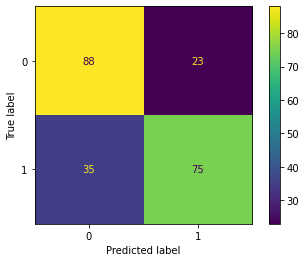

In [28]:
plot_confusion_matrix(lg,
                      X_test,
                      y_test,
                     )

# KNN: KNeighborsClassifier

In [29]:
knn_class=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
knn_class.fit(X_train,y_train)
score(knn_class,"KNN classifier")

Accuracy for KNN classifier : 0.74661 



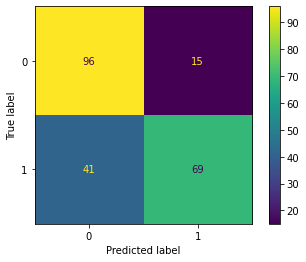

In [30]:
plot_confusion_matrix(knn_class,
                      X_test,
                      y_test,
                     )

## Support Vector Machine

In [31]:
sv_model =SVC()
sv_model.fit(X_train,y_train)
score(sv_model,"KNN classifier")

Accuracy for KNN classifier : 0.72851 



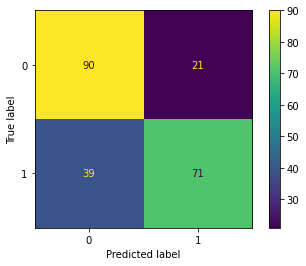

In [32]:
plot_confusion_matrix(sv_model,
                      X_test,
                      y_test,
                     )

# Naive Bayes: GaussianNB

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)
score(nb,"Naive Bayes")

Accuracy for Naive Bayes : 0.71946 



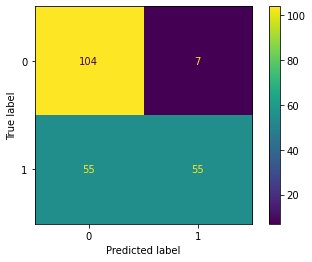

In [34]:
plot_confusion_matrix(nb,
                      X_test,
                      y_test,
                     )

# Decission trees: DecisionTreeClassifier

In [35]:
# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
dtree=DecisionTreeClassifier(random_state=10)
dtree.fit(X_train,y_train)
score(dtree,"DECISION tree classifier")

Accuracy for DECISION tree classifier : 0.66063 



In [36]:
dtree_gini=DecisionTreeClassifier(criterion= 'gini', max_depth=10, random_state=10)
dtree_gini.fit(X_train,y_train)
score(dtree_gini,"DECISION tree classifier")

Accuracy for DECISION tree classifier : 0.63801 



In [37]:
#YOUR CODE HERE
dtree_en=DecisionTreeClassifier(criterion= 'entropy', max_depth=10, random_state=10)
dtree_en.fit(X_train,y_train)
score(dtree_en,"DECISION tree classifier")

Accuracy for DECISION tree classifier : 0.70588 



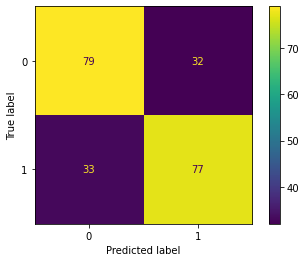

In [38]:
plot_confusion_matrix(dtree_en,
                      X_test,
                      y_test,
                     )

# Random Forest

In [39]:
# Random Forest
rfclass=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10)
rfclass.fit(X_train,y_train)
score(rfclass,"RandomForestClassifier ")

Accuracy for RandomForestClassifier  : 0.80543 



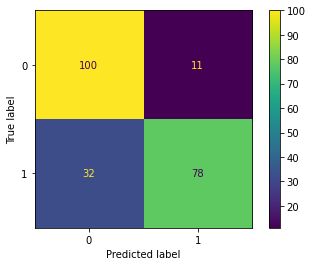

In [40]:
plot_confusion_matrix(rfclass,
                      X_test,
                      y_test,
                     )

# AdaBoostClassifier

In [42]:
# AdaBoostClassifier
adbclass=AdaBoostClassifier(n_estimators=1000,random_state=10)
adbclass.fit(X_train,y_train)
score(adbclass, "AdaBoostClassifier")

Accuracy for AdaBoostClassifier : 0.71041 



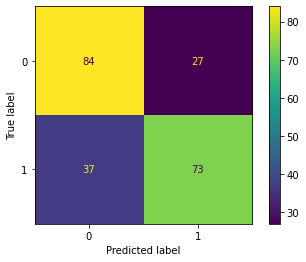

In [43]:
plot_confusion_matrix(adbclass,
                      X_test,
                      y_test,
                     )

 # XGBClassifier

In [44]:
from sklearn.metrics import plot_confusion_matrix
clf1 = XGBClassifier( objective='binary:logistic',n_estimators=1000,learning_rate=0.1,random_state=10)

clf1.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])


[0]	validation_0-aucpr:0.74666
[1]	validation_0-aucpr:0.75316
[2]	validation_0-aucpr:0.79175
[3]	validation_0-aucpr:0.80583
[4]	validation_0-aucpr:0.81289
[5]	validation_0-aucpr:0.82266
[6]	validation_0-aucpr:0.82887
[7]	validation_0-aucpr:0.83497
[8]	validation_0-aucpr:0.84121
[9]	validation_0-aucpr:0.84817
[10]	validation_0-aucpr:0.84439
[11]	validation_0-aucpr:0.84828
[12]	validation_0-aucpr:0.85153
[13]	validation_0-aucpr:0.85211
[14]	validation_0-aucpr:0.85941
[15]	validation_0-aucpr:0.85942
[16]	validation_0-aucpr:0.86249
[17]	validation_0-aucpr:0.86968
[18]	validation_0-aucpr:0.86757
[19]	validation_0-aucpr:0.87027
[20]	validation_0-aucpr:0.87294
[21]	validation_0-aucpr:0.87152
[22]	validation_0-aucpr:0.87223
[23]	validation_0-aucpr:0.87675
[24]	validation_0-aucpr:0.88027
[25]	validation_0-aucpr:0.88021
[26]	validation_0-aucpr:0.88066
[27]	validation_0-aucpr:0.88171
[28]	validation_0-aucpr:0.88047
[29]	validation_0-aucpr:0.88007
[30]	validation_0-aucpr:0.88197
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
preds=clf1.predict(X_test)
accuracy = round(accuracy_score(y_test, preds), 5)
print('Accuracy for', ':', accuracy, '\n')

Accuracy for : 0.79638 



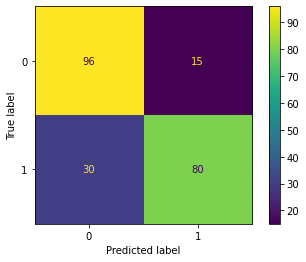

In [46]:
plot_confusion_matrix(clf1,
                      X_test,
                      y_test,
                     )

####  As among all the machine learning model random forrest classifier gives the best accuracy , so we will consider this model for prediction of given test data.

In [47]:
test_data=pd.read_csv("Test_data.csv")
test_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [48]:
print("Shape of test dataset :",test_data.shape)

Shape of test dataset : (555, 19)


In [49]:
print(test_data.isna().sum())

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64


In [50]:
pred_csv=rfclass.predict(test_data)

In [51]:
res=pd.DataFrame(pred_csv,columns=["prediction"])

res.head()


,prediction
0,0
1,0
2,0
3,0
4,1


In [52]:
# save predicted file in csv format
res.to_csv("predict_result.csv",index=False)